## Лабораторна робота 4. **REGRESSION** 📈

# Опис вибірки "Motorbike Ambulance Calls"


Аварії за участю мотоциклів та відповідні виклики швидкої допомоги сильно залежать від екологічних та сезонних умов, таких як погодні умови, опади, день тижня, сезон, година дня тощо. Дані збирались протягом двох років щогодини та потім співвідносилися з відповідною погодою та сезонністю.

Основні характеристики вибірки `motorbike_ambulance_calls.csv`:

              - index: record index
              - date : date
              - season : season (1:springer, 2:summer, 3:fall, 4:winter)
              - yr : year (0: 2011, 1:2012)
              - mnth : month ( 1 to 12)
              - hr : hour (0 to 23)
              - holiday : whether day is holiday or not
              - weekday : day of the week
              - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
              -  weathersit :
                      - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
                      - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                      - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                      - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
              - temp : Normalized temperature in Celsius. The values are divided to 41 (max)
              - atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
              - hum: Normalized humidity. The values are divided to 100 (max)
              - windspeed: Normalized wind speed. The values are divided to 67 (max)
              - cnt: count of total ambulance calls

## Імпорт необхідних бібліотек та завантаження даних

**Завдання 1** підготовка даних до опрацювання

1. завантажте вибірку `motorbike_ambulance_calls.csv`;   
2. підключіть необхідні бібліотеки;  
3. вивести основну статистичну інформацію по числовим змінним;  
4. окремо вивести максимальні та мінімальні значення по всім змінним;  
5. вивести розмірність датасету;

In [45]:
import pandas as pd
import numpy as np
import scipy as sc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

dataset = pd.read_csv('motorbike_ambulance_calls.csv')

In [37]:
def get_data(data_path: str):
    data = pd.read_csv(data_path)
    statistical = data.describe()
    
    velue_max = data.max()
    velue_min = data.min()
    shape  = data.shape
    
    return statistical, velue_max, velue_min, shape 

In [38]:
data = get_data(data_path='motorbike_ambulance_calls.csv')
statistical, velue_max, velue_min, shape = data

print("Statistical:\n", statistical) 
print("\nMax:\n", velue_max)
print("\nMin:\n", velue_min)
print("\nDimensions of the dataset:\n", shape)

Statistical:
             index            yr          mnth            hr       holiday  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      0.502561      6.537775     11.546752      0.028770   
std     5017.0295      0.500008      3.438776      6.914405      0.167165   
min        1.0000      0.000000      1.000000      0.000000      0.000000   
25%     4345.5000      0.000000      4.000000      6.000000      0.000000   
50%     8690.0000      1.000000      7.000000     12.000000      0.000000   
75%    13034.5000      1.000000     10.000000     18.000000      0.000000   
max    17379.0000      1.000000     12.000000     23.000000      1.000000   

            weekday    workingday    weathersit          temp         atemp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       3.003683      0.682721      1.425283      0.496987      0.475775   
std        2.005771      0.465431      0.639357      0.

**Завдання 2** перевірити типи даних та перевірте кількість даних по кожній змінній.

In [46]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       17379 non-null  int64  
 1   date        17379 non-null  object 
 2   season      17379 non-null  object 
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  cnt         17379 non-null  int64  
dtypes: float64(4), int64(9), object(2)
memory usage: 2.0+ MB


**Завдання 3** пепевірте всі змінні на наявність пропусків.

In [40]:
missing_values = dataset.isnull().sum()
missing_values_summary = missing_values[missing_values > 0]

if missing_values_summary.empty:
    print("No missing values")
else:
    print("Missing values summary:\n", missing_values_summary)



No missing values


**Висновки з 1-3 завдання (детальні)**



1. Числовий аналіз показує розподіл ключових змінних, таких як температура, вологість, і швидкість вітру. Ці дані ідеально підходять для подальшого детального аналізу та прогнозування.  
2. Типи даних варіюються між int64, float64 та object, де числові змінні правильно представлені як цілі та дійсні числа, але дата та пора року зберігаються як строки, що може вимагати подальшого перетворення для аналізу. 
3. У Датасеті відсутні пропущені значення.



**Завдання 4** перетворіть змінну `date` в **date type**. Визначте часові межі датасету.

In [5]:
def transform_date(df: pd.DataFrame, date_col_name: str) -> pd.DataFrame:
    df[date_col_name] = pd.to_datetime(df[date_col_name])
    return df

data = transform_date(dataset, 'date')

/var/folders/w6/d2qw7g4x7bqd_h483v7f6s_h0000gn/T/ipykernel_1781/2719854376.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[date_col_name] = pd.to_datetime(df[date_col_name])


In [7]:
def get_time_limits(df: pd.DataFrame, date_col_name: str):
    first_day = df[date_col_name].min()
    last_day = df[date_col_name].max()
    print(f"First day of dataset - {first_day}.\nLast day of dataset - {last_day}")

get_time_limits(dataset, 'date')

First day of dataset - 2011-01-01 00:00:00.
Last day of dataset - 2012-12-31 00:00:00


 Дані охоплюють період з 1 січня 2011 року по 31 грудня 2012 року. Це означає, що у нас є два повних роки даних про виклики мотоциклетних швидких допомог, що дозволяє аналізувати сезонні зміни, тенденції протягом року та порівняти різні місяці між собою.

#Аналіз категоріальних змінних

**Завдання 5** виділити категоріальні змінні в окремий датасет







In [21]:
categorical_columns  = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
data_categorical = data[categorical_columns]

data_categorical.head()


,season,yr,mnth,hr,holiday,weekday,workingday,weathersit
0,spring,0,1,0,0,6,0,1
1,spring,0,1,1,0,6,0,1
2,spring,0,1,2,0,6,0,1
3,spring,0,1,3,0,6,0,1
4,spring,0,1,4,0,6,0,1


**Завдання 6** перетворіть змінну `season` в числову шкалу.

In [23]:
def encode_season(df: pd.DataFrame, season_col_name: str):
    season_mapping = {'spring': 1, 'summer': 2, 'autumn': 3, 'winter': 4}
    df[season_col_name] = df[season_col_name].map(season_mapping)
    return df

data = encode_season(data, 'season')


**Завдання 7** побудувати графіки `countplot` по всім категоріальним змінним

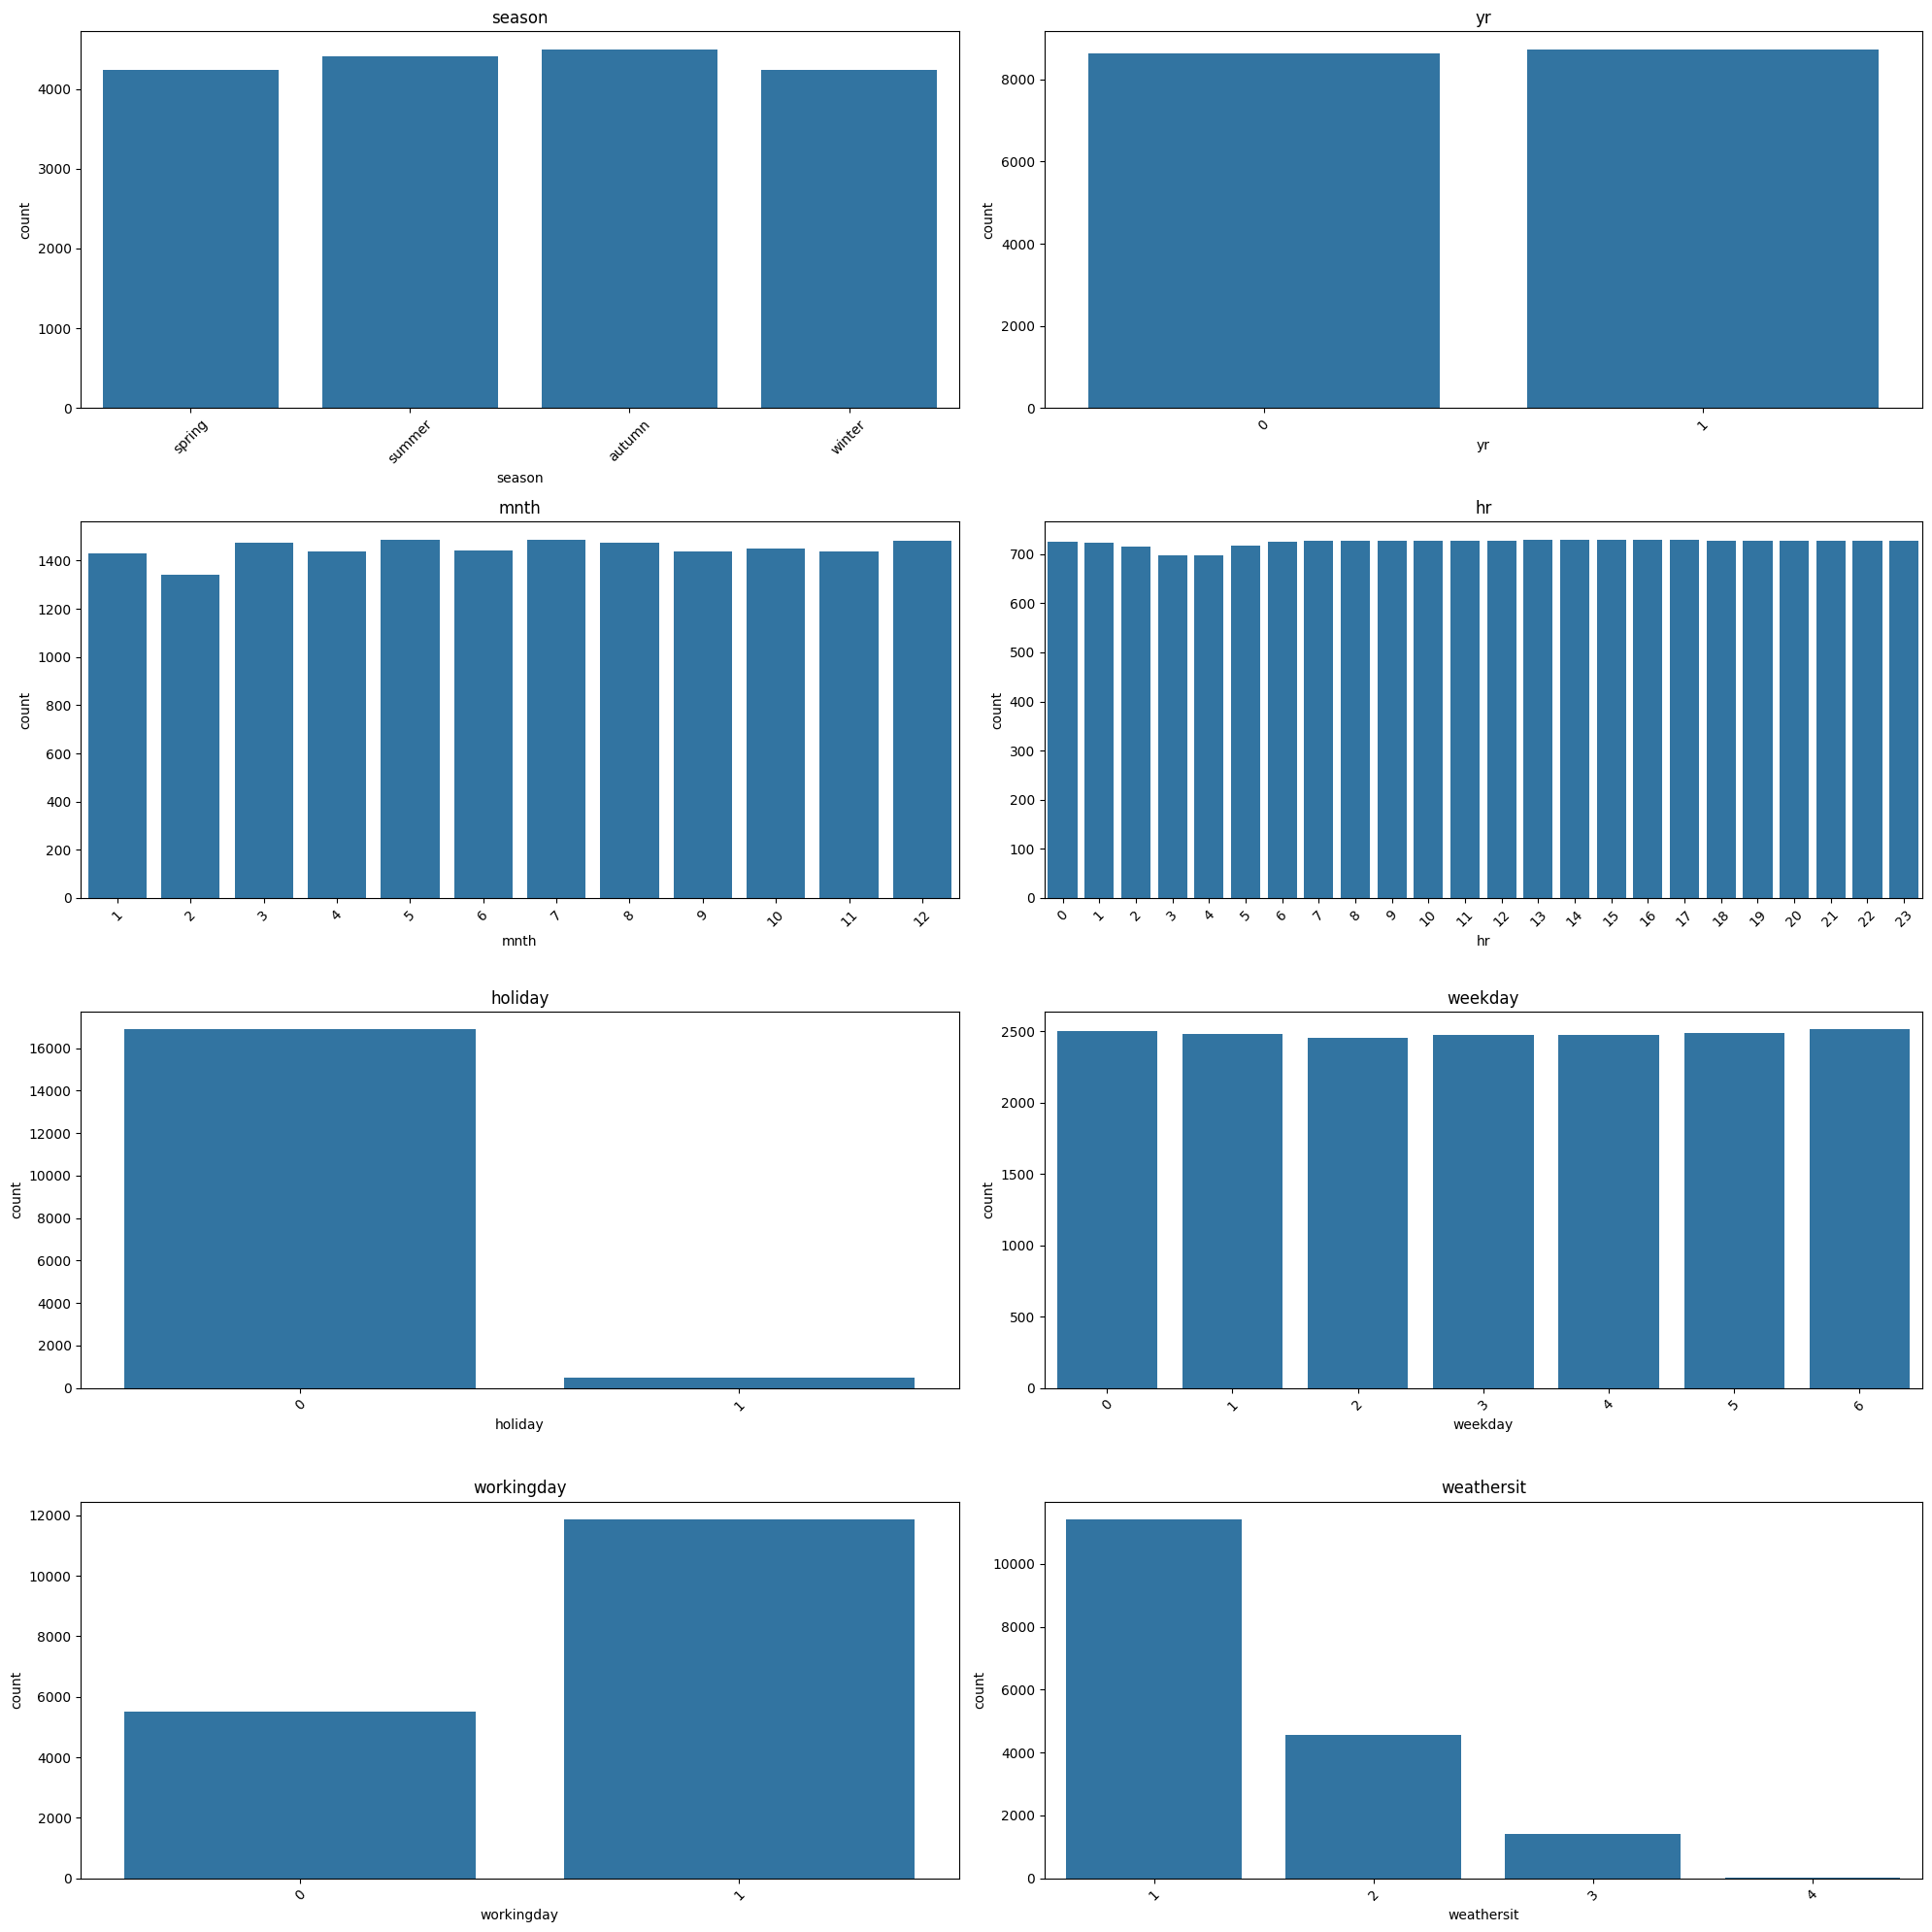

In [24]:
fig, ax = plt.subplots(4, 2, figsize=(20, 20))  
for variable, subplot in zip(data_categorical.columns, ax.flatten()):
    sns.countplot(x=variable, data=data_categorical, ax=subplot)
    subplot.set_title(variable)
    for label in subplot.get_xticklabels():
        label.set_rotation(45)

plt.tight_layout()
plt.show()

**Висновки з 5-7 завдання (детальні)**



1. Виділення категоріальних змінних в окремий датасет є важливим кроком в процесі аналізу даних, оскільки це дозволяє застосовувати спеціалізовані методи обробки та аналізу для категоріальних даних. 
2. Перетворення категоріальної змінної season в числову шкалу дозволяє алгоритмам машинного навчання та статистичним методам ефективно обробляти інформацію про сезони, сприяючи кращому виявленню закономірностей та залежностей. 
3. На графіках можна побачити, як різні години дня, місяці та сезони представлені в кількості викликів. Виявлено значні відмінності у розподілі деяких категорій, що може вказувати на потенційний вплив цих змінних на кількість викликів. 



#Аналіз числових змінних

**Завдання 8** виділити числові змінні в окремий датасет

In [27]:
numerical_columns = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
data_numerical = data[numerical_columns]
data_numerical

,temp,atemp,hum,windspeed,cnt
0,0.24,0.2879,0.81,0.0000,16
1,0.22,0.2727,0.80,0.0000,40
2,0.22,0.2727,0.80,0.0000,32
3,0.24,0.2879,0.75,0.0000,13
4,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...
17374,0.26,0.2576,0.60,0.1642,119
17375,0.26,0.2576,0.60,0.1642,89
17376,0.26,0.2576,0.60,0.1642,90
17377,0.26,0.2727,0.56,0.1343,61


**Завдання 9** побудуйте гістограми розподілу по всім числовим змінним

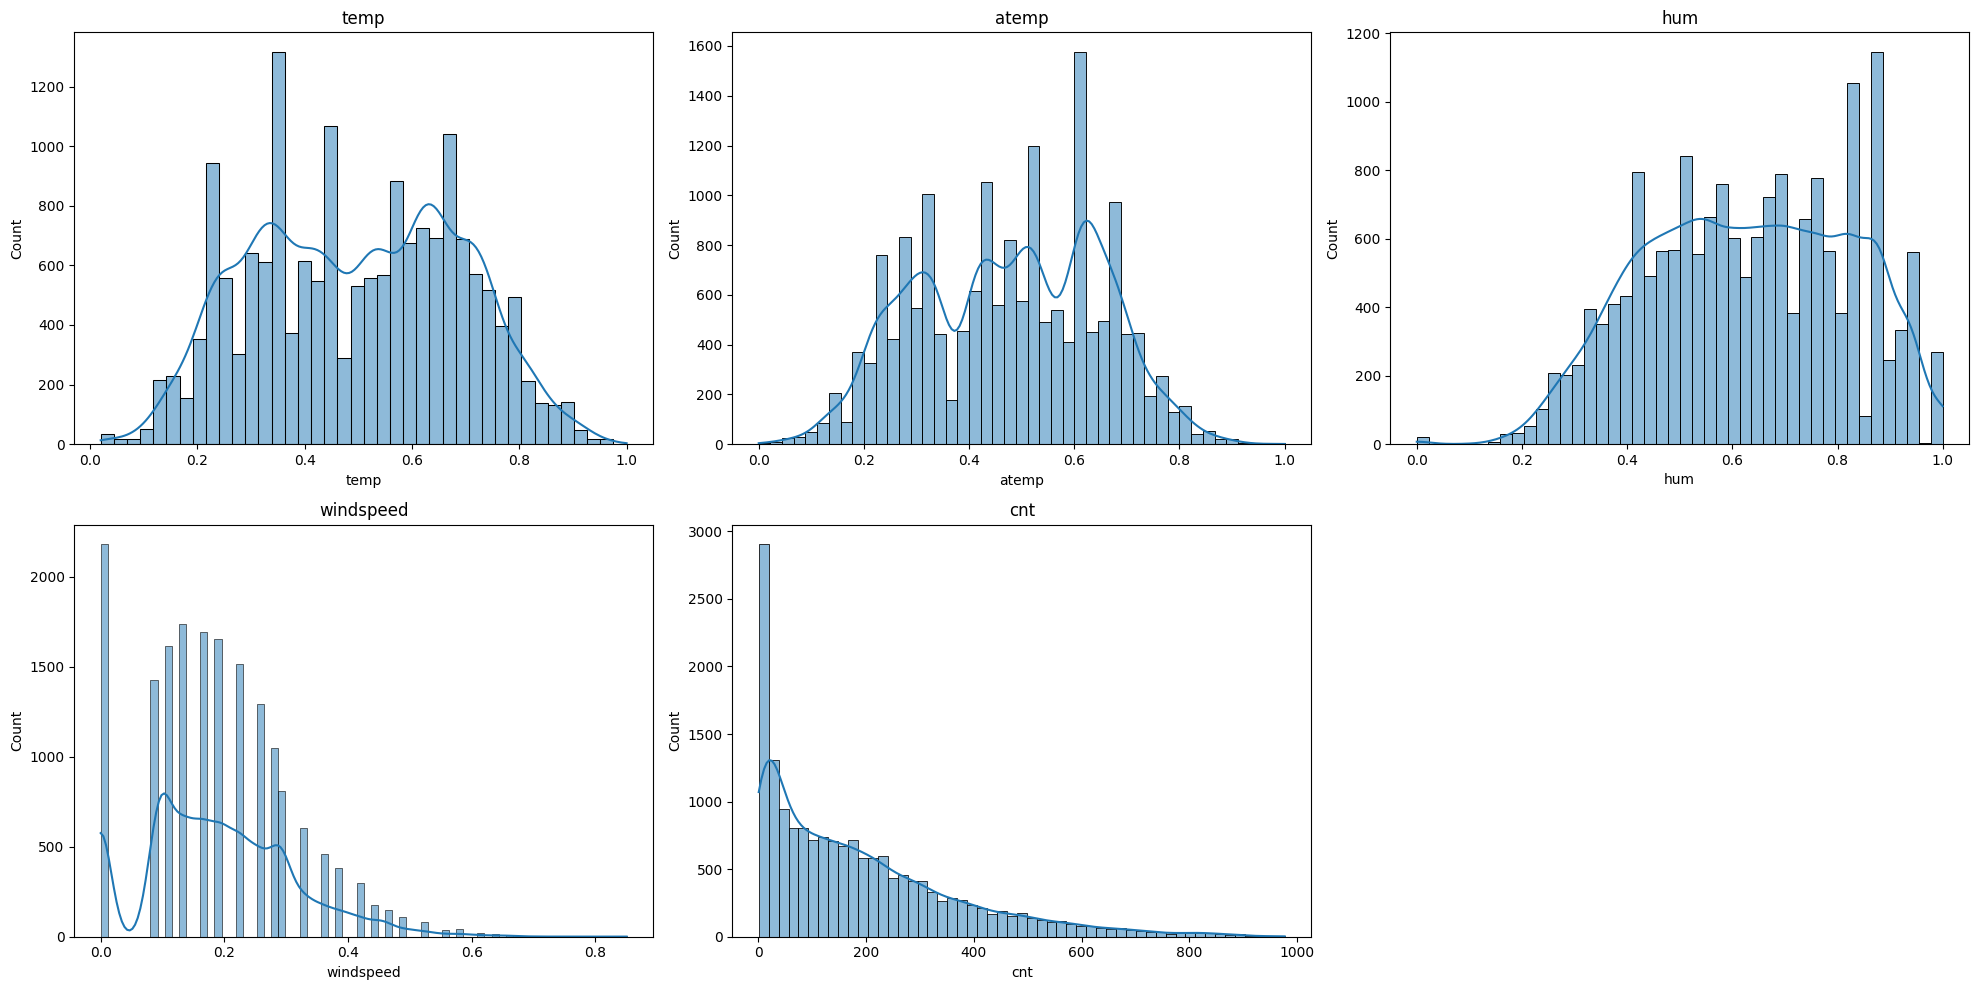

In [32]:
fig, ax = plt.subplots(2, 3, figsize=(20, 10)) 

for var, subplot in zip(data_numerical.columns, ax.flatten()):
    sns.histplot(data_numerical[var], ax=subplot, kde=True)
    subplot.set_title(var)

plt.tight_layout()

ax[-1, -1].set_visible(False)

plt.show()

**Завдання 10** побудуйте гістограму розподілу цільової змінної та розрахуйте коефіціент нахилу

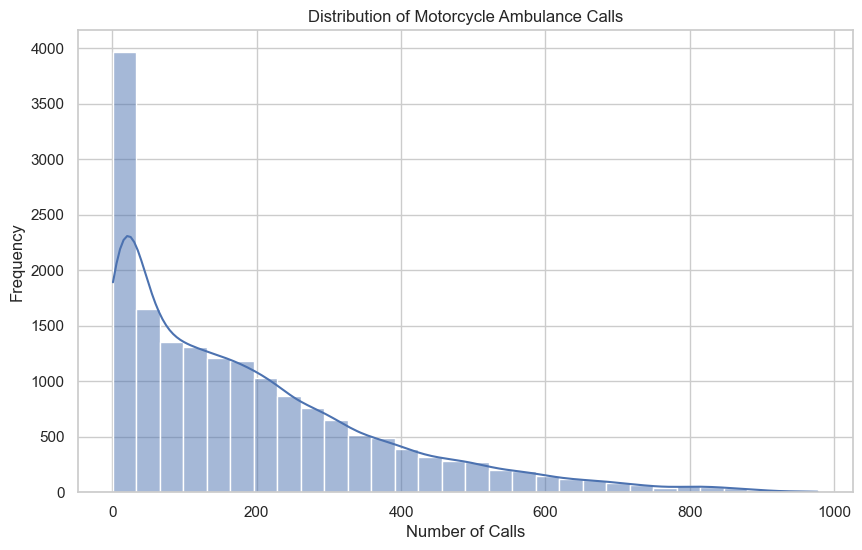

Skewness: 1.2774116037490577


In [33]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(data['cnt'], bins=30, kde=True)
plt.title('Distribution of Motorcycle Ambulance Calls')
plt.xlabel('Number of Calls')
plt.ylabel('Frequency')
plt.show()

skewness = data['cnt'].skew()
print("Skewness:", skewness)

**Висновки з 8-10 завдання (детальні)**



1. Виділення числових змінних в окремий датасет є важливим кроком для аналізу та моделювання даних. Це спрощує визначення кореляцій, виявлення закономірностей та розробку ефективних моделей прогнозування. Числові змінні, такі як температура, відчувана температура, вологість і швидкість вітру, мають безпосередній вплив на кількість викликів. 
2. Температура та відчувана температура мають схожі розподіли, що вказує на тісний зв'язок між цими змінними та їх вплив на кількість викликів. Розподіл вологості вказує на велику варіативність цієї змінної, але з помірною концентрацією значень у середньому діапазоні. Швидкість вітру має спадний розподіл, з більшістю спостережень, що мають низьку до помірної швидкість. Кількість викликів показує широкий розподіл, з невеликою кількістю днів із дуже високою кількістю викликів, що може вказувати на певні зовнішні події або умови, що сприяють збільшенню використання.
3. Розподіл кількості викликів швидкої допомоги має явний правий нахил, який свідчить про нерівномірний попит. Коефіцієнт нахилу в 1.28 вказує на присутність днів з особливо великою кількістю викликів, що може бути результатом специфічних подій або умов. Знання цього допомагає розуміти, як розподіляються виклики та планувати ресурси для швидкої допомоги.

#Аналіз взаємозв'язків між числовими і категоріальними змінними

**Завдання 11** побудуйте графіки співвідношення `scatterplot` між всіма числовими змінними і цільовою змінною `cnt`

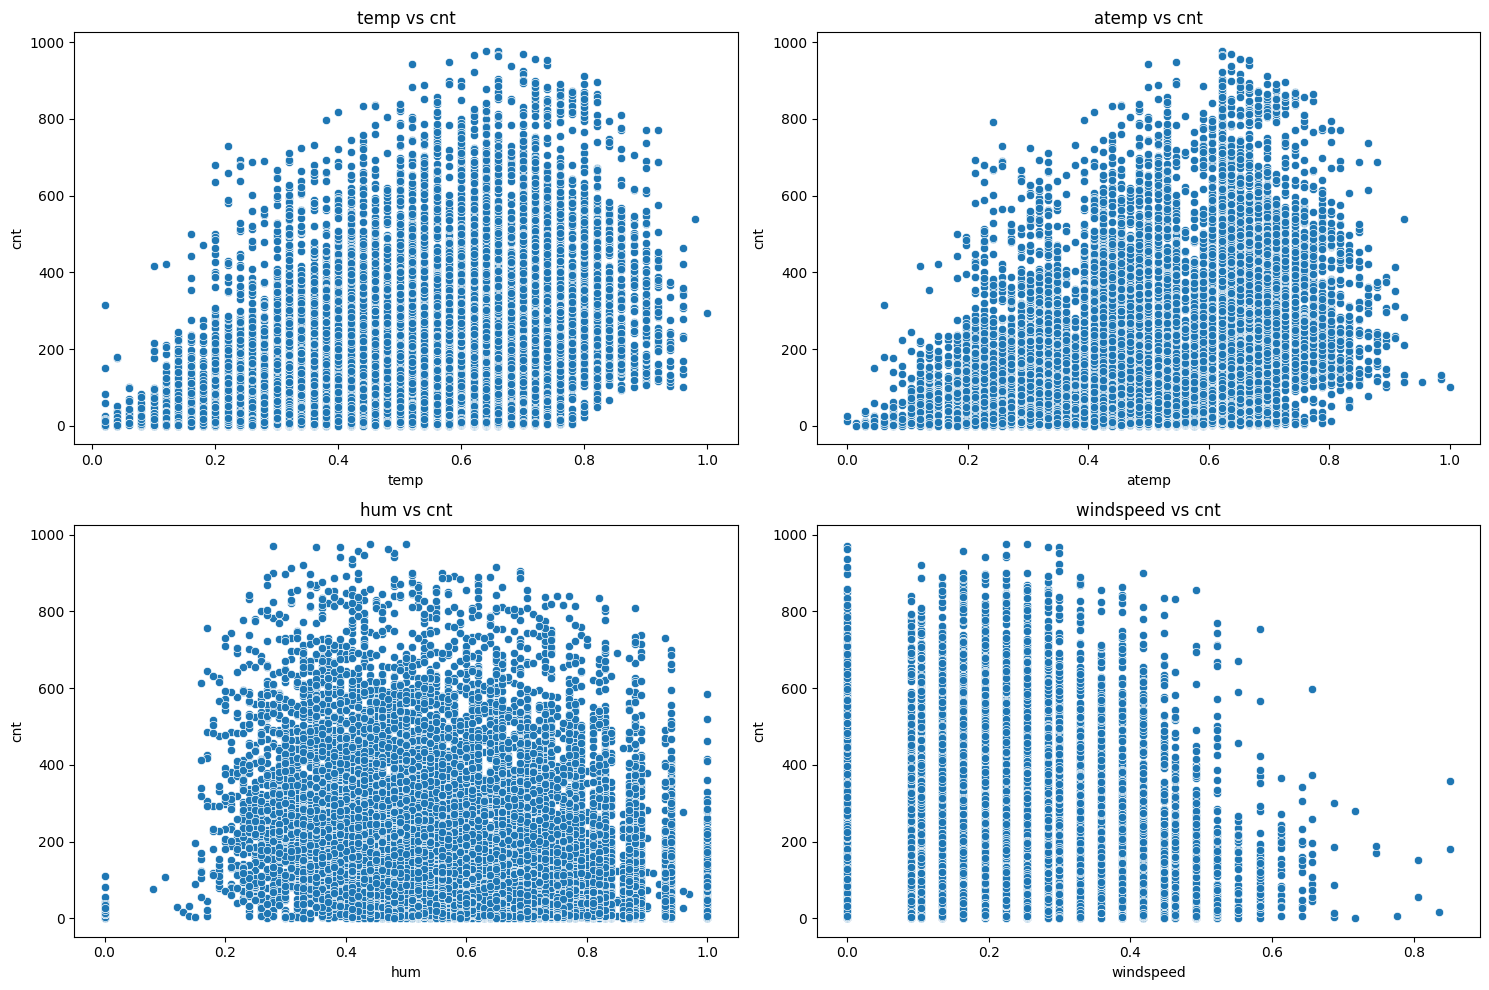

In [16]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
for var, subplot in zip(data_numerical.drop('cnt', axis=1).columns, ax.flatten()):
    sns.scatterplot(x=var, y='cnt', data=data_numerical, ax=subplot)
    subplot.set_title(f'{var} vs cnt')

plt.tight_layout()
plt.show()

**Завдання 12** побудуйте графіки співвідношення `boxplot`[boxplot](https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html) між категоріальними змінними і цільовою змінною `cnt`.

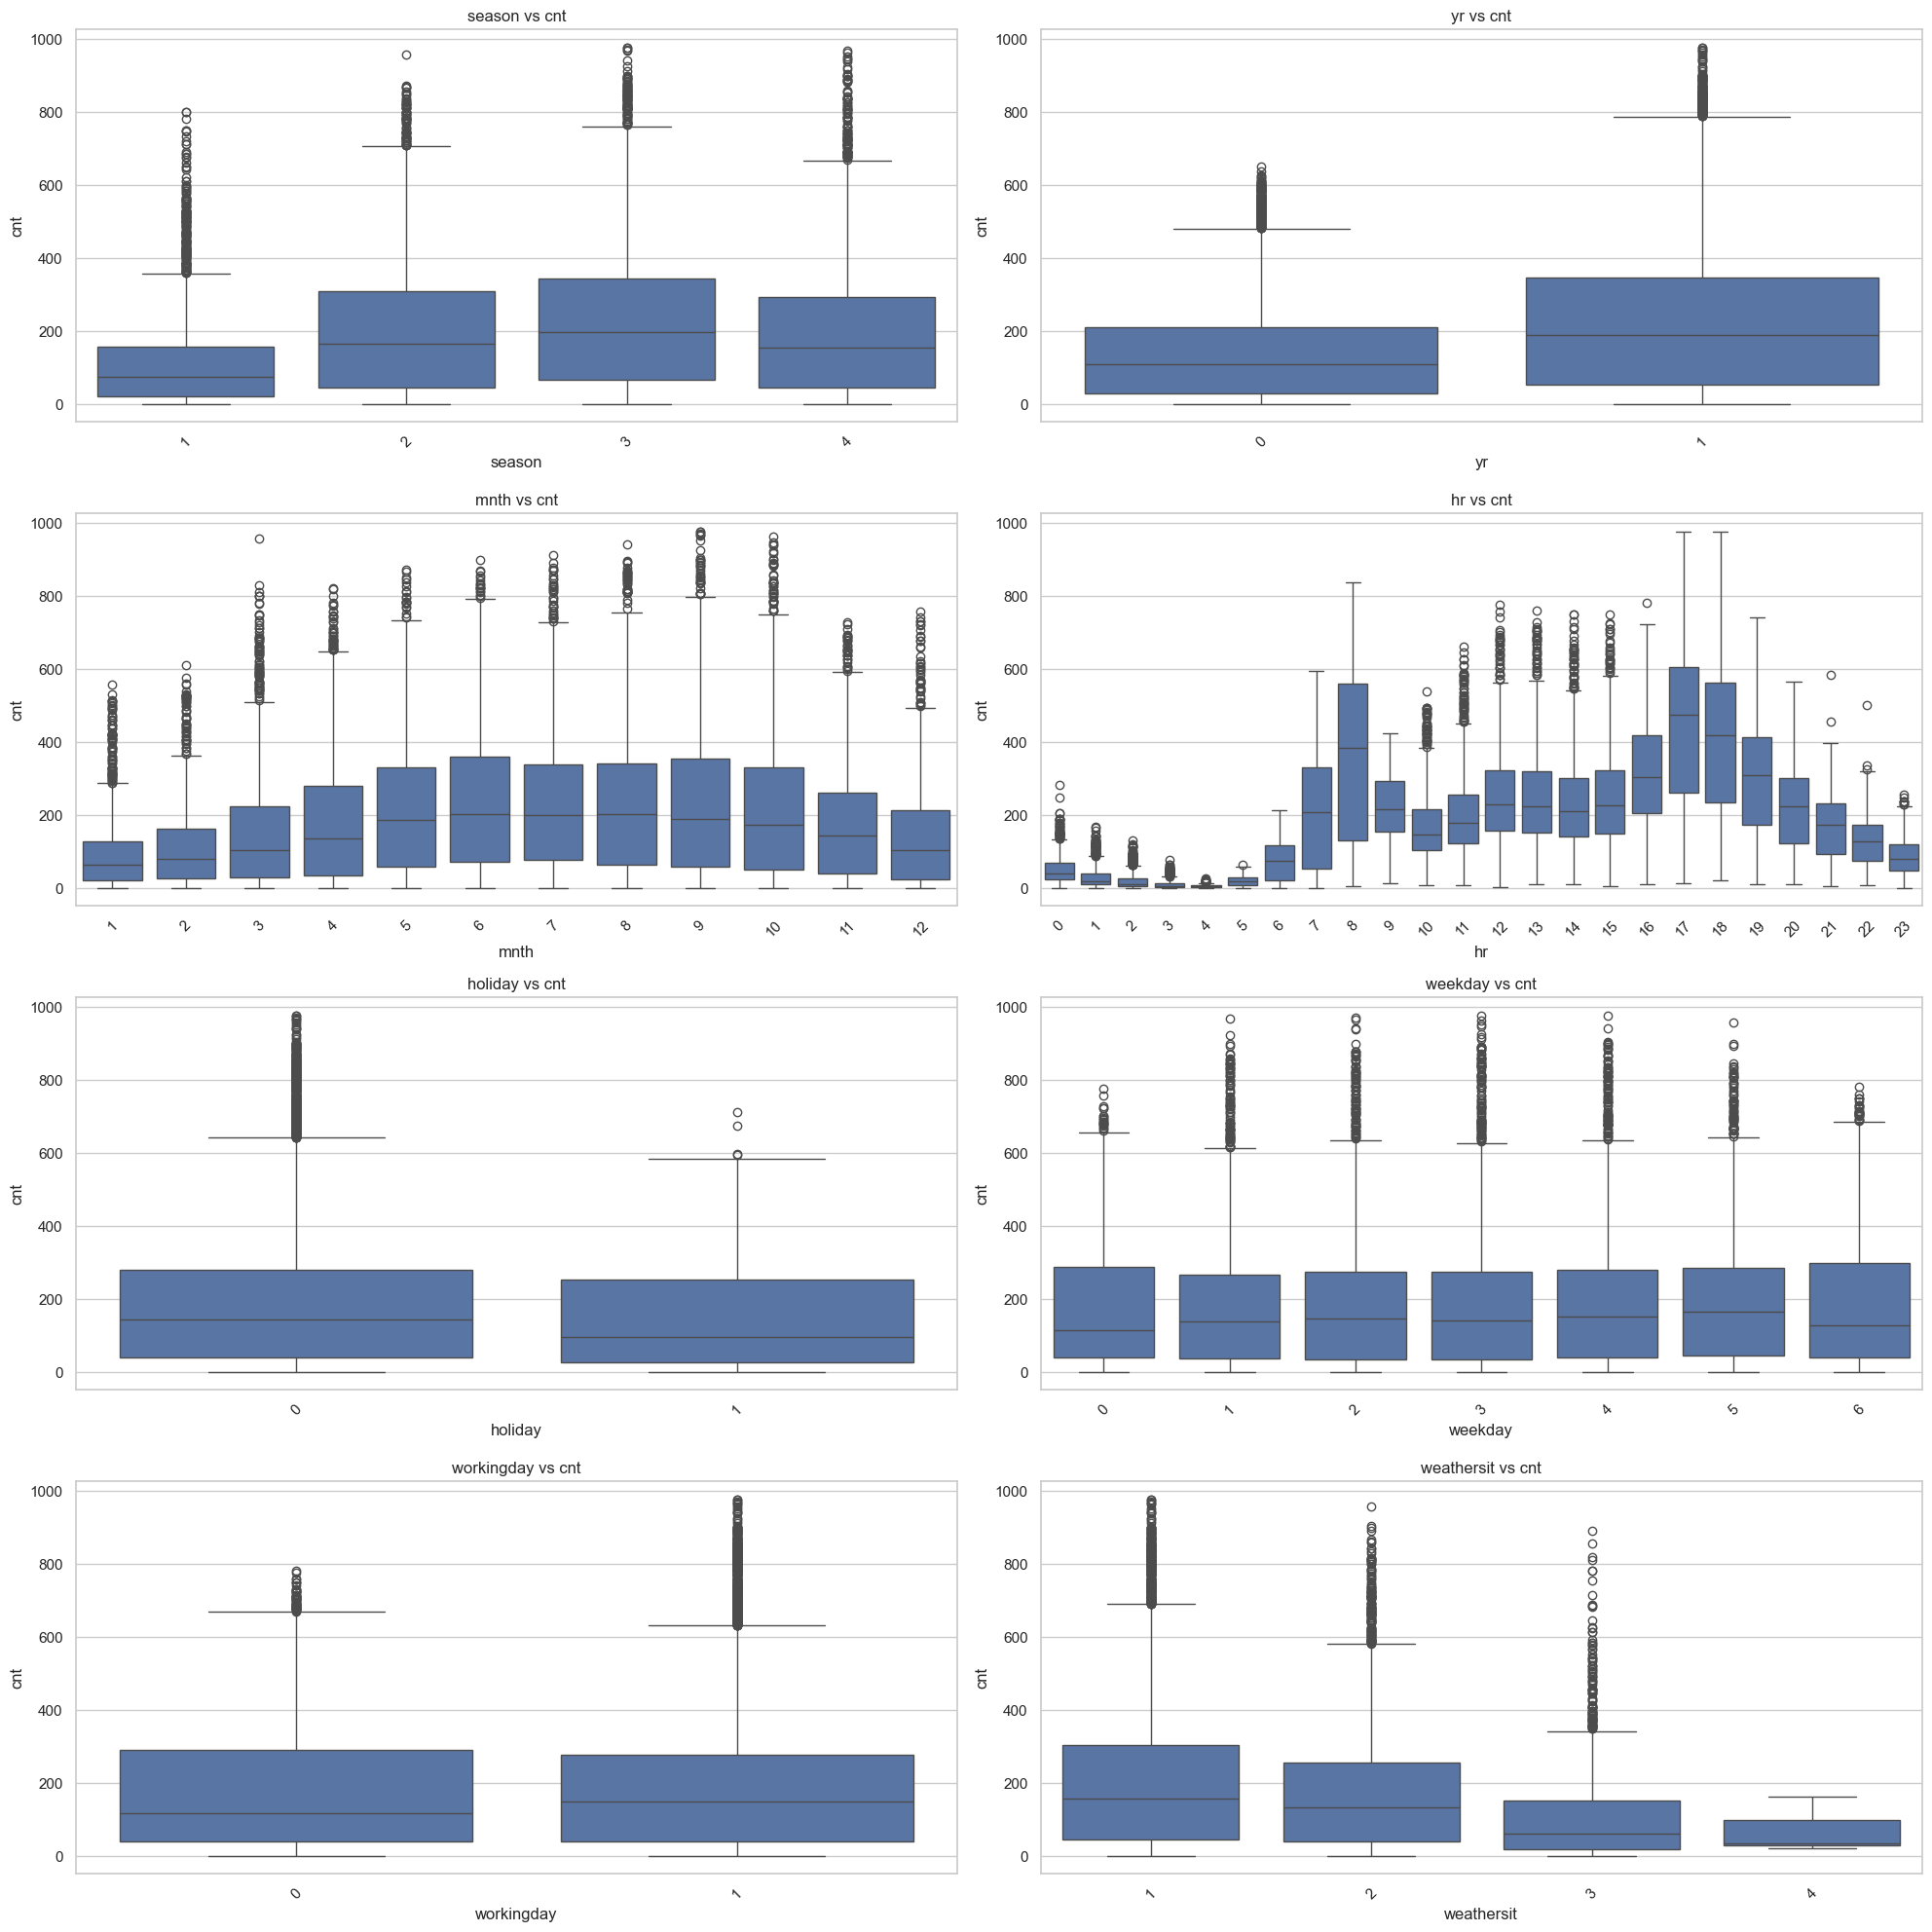

In [34]:
fig, ax = plt.subplots(4, 2, figsize=(20, 20))  

for var, subplot in zip(data_categorical.columns, ax.flatten()):
    sns.boxplot(x=var, y='cnt', data=data, ax=subplot)
    subplot.set_title(f'{var} vs cnt')
    for label in subplot.get_xticklabels():
        label.set_rotation(45)

plt.tight_layout()
plt.show()

**Висновки з 11-12 завдання (детальні)**



1. Виділення числових змінних в окремий датасет дозволяє легше виявляти кореляції між змінними, оцінювати їх вплив на результати та проводити глибший статистичний аналіз.
2. Графіки демонструють зв'язок між фізичними умовами і кількістю викликів, дозволяючи візуально оцінити, як змінюється попит на виклики швидкої допомоги залежно від погодних умов. Зокрема, можна спостерігати, що температура і відчувана температура мають позитивний зв'язок з кількістю викликів, тоді як висока вологість може мати негативний вплив.
3. Графіки демонструють розподіл кількості викликів у залежності від різних категорій, таких як сезон, рік, місяць, година дня, святкові дні, дні тижня, робочі дні та погодні умови. Ці візуалізації дозволяють виявити різноманітність розподілів цільової змінної в залежності від кожної категорії, включаючи виявлення викидів та порівняння медіан.



**Завдання 13** Побудувати матрицю кореляції:  

1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти  
3.   Вирахувати кореляційні коефіціенти для набору данних за методом Спірмана
4.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

5. Описати отримані результати, спираючись на значення коефіціентів кореляції та пояснити в чому відмінність обраних методів.

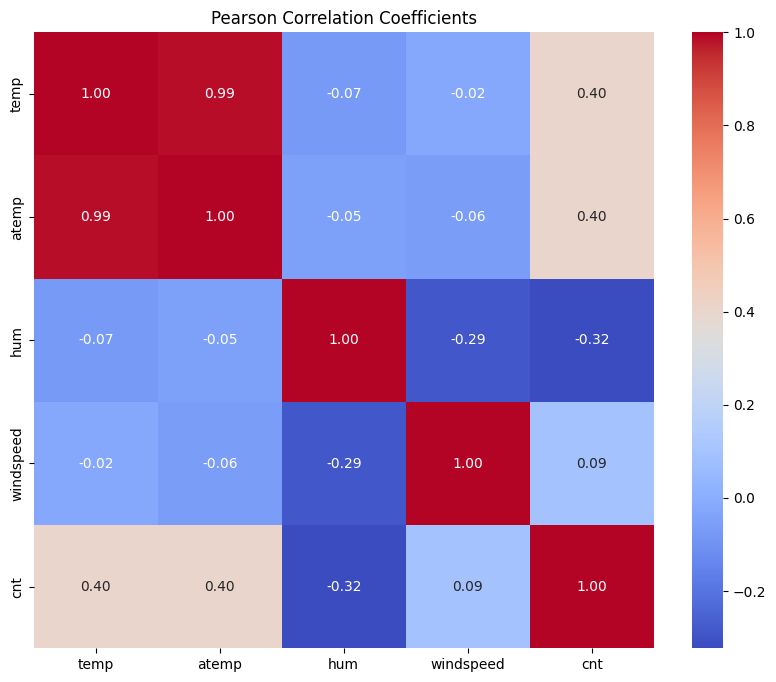

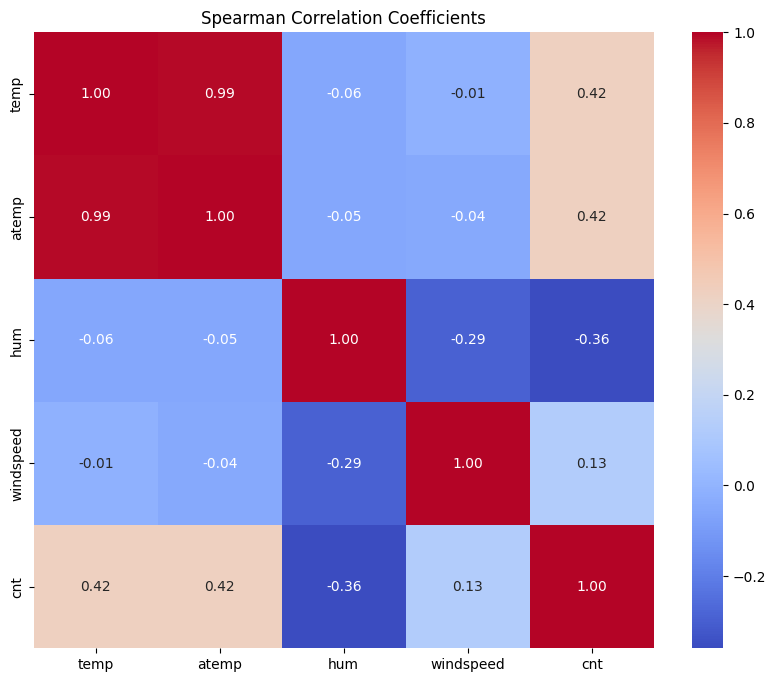

In [19]:
pearson_corr = data_numerical.corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Coefficients')
plt.show()

spearman_corr = data_numerical.corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Correlation Coefficients')
plt.show()

Теплокарти демонструють ступінь лінійного зв'язку та монотонного зв'язку між числовими змінними датасету. За допомогою цих візуалізацій можна спостерігати, які змінні мають найбільш виражені кореляції з цільовою змінною cnt та між собою.

**Завдання 14** 
1. побудувати модель лінійної регресії:
2. видалити змінні, які НЕ є релевантними;

3. поділити вибірку на `train`, `test` та `validation` в пропорції `70/30`;  

4. провести навчання моделі лінійної регресії;

1. Для подальшої роботи з моделями для кожної категоріальної змінної ми створимо фіктивні змінні, щоб уникнути неправильного порядку категорій. [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)

In [40]:
def get_dummies(df: pd.DataFrame):
    features = pd.concat([df,
                          pd.get_dummies(df['season'], prefix='season'),
                          pd.get_dummies(df['mnth'], prefix='mnth'),
                          pd.get_dummies(df['weekday'], prefix='weekday'),
                          pd.get_dummies(df['weathersit'], prefix='weathersit')],
                         axis=1)
    features = features.drop(['season',
                            'mnth', 
                            'weekday', 
                            'weathersit'
                            ], axis = 1)
    return features

In [39]:
features = get_dummies(dataset)
features

,index,date,yr,hr,holiday,workingday,temp,atemp,hum,windspeed,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,1,1/1/11,0,0,0,0,0.24,0.2879,0.81,0.0000,...,False,False,False,False,False,True,True,False,False,False
1,2,1/1/11,0,1,0,0,0.22,0.2727,0.80,0.0000,...,False,False,False,False,False,True,True,False,False,False
2,3,1/1/11,0,2,0,0,0.22,0.2727,0.80,0.0000,...,False,False,False,False,False,True,True,False,False,False
3,4,1/1/11,0,3,0,0,0.24,0.2879,0.75,0.0000,...,False,False,False,False,False,True,True,False,False,False
4,5,1/1/11,0,4,0,0,0.24,0.2879,0.75,0.0000,...,False,False,False,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,12/31/12,1,19,0,1,0.26,0.2576,0.60,0.1642,...,True,False,False,False,False,False,False,True,False,False
17375,17376,12/31/12,1,20,0,1,0.26,0.2576,0.60,0.1642,...,True,False,False,False,False,False,False,True,False,False
17376,17377,12/31/12,1,21,0,1,0.26,0.2576,0.60,0.1642,...,True,False,False,False,False,False,True,False,False,False
17377,17378,12/31/12,1,22,0,1,0.26,0.2727,0.56,0.1343,...,True,False,False,False,False,False,True,False,False,False


2. На основі змінної часу створіть нову змінну, яка відповідатиме за день і ніч.

In [41]:
features['night_hours'] = features['hr'].apply(lambda x: 1 if 22 <= x or x < 6 else 0)
features = features.drop('hr', axis=1)


**Модель лінійної регрессії  

[train_linear_model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Після отримання фіктивних змінних потрібно видалити по одній з кожної категорії, щоб запобігти мультиколінеарності. Також видаляємо ще два атрибути `date` та `atemp` - поясніть чому?

In [32]:
features_lr = features.drop(['atemp', 'date'], axis = 1)

In [30]:
def get_train_data(df: pd.DataFrame, target:str, test_size:float):
  X = df.drop(target, axis = 1)
  y = df[target]
  X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=test_size, random_state=42, shuffle = True)
  return X_train, X_test, y_train, y_test

In [33]:
X_train, X_test, y_train, y_test = get_train_data(features_lr, 'cnt', 0.3)

In [34]:
def train_linear_model(X_train, y_train):
  model = LinearRegression()
  model.fit(X_train, y_train)
  return model

model = train_linear_model(X_train, y_train)

In [35]:
# predict
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
# scores
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 15877.966, test: 15224.769
R^2 train: 0.525, test: 0.518


Оскільки в нашій моделі є багато незалежних змінних, ми не можемо відобразити їх залежність у двовимірному просторі, але ми можемо побудувати графік взаємозв'язку між залишками моделі та передбачуваними значеннями, що також допоможе нам оцінити якість моделі.

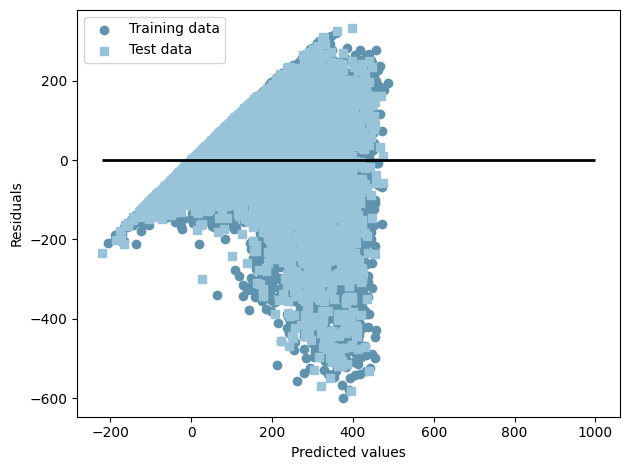

In [36]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='#5f93ad', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='#98c3d9', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-220, xmax=1000, lw=2, color='#000000')
plt.tight_layout()

**Висновки з завдання (детальні)**



1. За допомогою цієї функції можна перетворити текстові категорії в датафреймі на числа, що робить дані зручнішими для аналізу комп'ютером. Вона допомагає машинам краще розуміти та працювати з інформацією про погоду, час і дати, видаляючи старі текстові колонки. 
2. Модель має помірну точність з невеликою різницею в помилках між тренувальними та тестовими даними, що свідчить про її стабільність. Однак, коефіцієнт детермінації R^2 близько 0.52 для обох наборів даних вказує на значний потенціал для покращення моделі.   
3. На діаграмі залишків видно, що помилки збільшуються з ростом прогнозованих значень. Це свідчить про те, що модель краще працює з меншими значеннями та може недооцінювати великі. Є також багато великих залишків, що показує на непостійність моделі, особливо для високих значень викликів.